
# CM3060 Natural Language Processing Midterm Coursework

## I. Introduction

### 1.Domain-specific area
The project focuses on Fake News Detection. Despite the assumption that individuals can differentiate between real and fake news, they are often misled [1]. Falling prey to fake news results in significant distress,spreading misinformation and causing confusion [2]. This area is critical in both industry and academia due to the increasing spread of misinformation online. The Singapore government introduced the Protection from Online Falsehoods and Manipulation Act (POFMA) to combat fake news, but its effectiveness has been limited due to selective and low usage [3].


Detecting fake news using POFMA often takes up to two working days, followed by a complex process to assess credibility and intent of the information [4]. This delay hinders the timely intervention and correction. Thus,  developing an instantaneous solution using an NLP model is crucial. By leveraging advanced text classification techniques, this project aims to contribute to more robust and efficient methods for detecting fake news.
A Survey of Fake News: Fundamental Theories, Detection Methods, and Opportunities
 highlighted the need for more sophisticated and rapid detection systems [4]. This project's results could potentially improve the existing approaches, providing a significant leap in the fight against misinformation.


### 2.Objectives
This project aims to explore the effectiveness and applicability of both statistical and embedding-based models in fake news detection. The primary objectives are:


1. Baseline Performance: Establish a baseline performance using a K-Nearest Neighbors (KNN) model. The KNN model will serve as a benchmark to gauge the performance of the statistical and embedding models. It will help understand how well the statistical model (e.g., Naive Bayes) and embedding model (e.g., BERT) perform compared to this basic yet reliable classifier. This step is crucial for understanding the relative performance gains provided by Naive Bayes and BERT over a baseline classifier, providing insights into which approach offers superior performance in detecting fake news.


2. Model Comparison: Evaluate and compare the performance of the statistical model, Naive Bayes, and the embedding-based model, LSTM (Long Short-Term Memory), in detecting fake news. By comparing these two fundamentally different approaches, the project will provide insights into their respective strengths and weaknesses. This comparison will help determine which model is more suitable in detecting fake news based on the dataset's characteristics and complexities.


3. Accuracy and Evaluation Metrics: Assess the models using various evaluation metrics such as accuracy, precision, recall, and F1-score. These metrics will provide a comprehensive understanding of each model's strengths and weaknesses in the context of fake news detection.


By achieving these objectives, the project will provide a robust framework for fake news detection, offering insights into the practical application of different NLP models. The comparative analysis will help identify the most effective approaches for combating misinformation, contributing to the development of more reliable and efficient fake news detection systems. The findings will also add value to the existing body of research on fake news detection, providing empirical evidence and practical recommendations for future studies and applications.


This comprehensive exploration and evaluation of statistical and embedding-based models will ultimately enhance the understanding of their capabilities and limitations, paving the way for more sophisticated and effective tools to tackle the pervasive issue of fake news.

### 3.Dataset Description

The selected dataset is the "Fake and Real News" dataset from Kaggle, which is a binary classification dataset. It is separated into two files:

Fake.csv: Contains 23,502 fake news articles.
True.csv: Contains 21,417 true news articles.

Dataset columns include:

  Title: Title of the news article.
  Text: Body text of the news article.
  Subject: Subject of the news article.
  Date: Publish date of the news article.

This dataset provides a substantial and balanced source for training and testing text classification models.

### 4. Evaluation methodology

Evaluation metrics play a crucial role in assessing the effectiveness of models in Fake News Detection. The chosen metrics include accuracy, precision, recall, and F1-score.[5]
Accuracy measures the overall correctness of predictions made by the model, providing a straightforward indication of its performance.
Precision indicates the proportion of correctly predicted positive instances (true positives) out of all instances predicted as positive. It helps in understanding the model's ability to avoid false positives.
Recall measures the proportion of correctly predicted positive instances out of all actual positive instances. It reveals the model's capability to capture all positive instances without missing any (false negatives).
F1-score is the harmonic mean of precision and recall. It balances between precision and recall, providing a single metric to evaluate the model's performance across both aspects.
These metrics collectively offer a comprehensive evaluation framework. They help in judging how well the models distinguish between fake and real news, considering both the model's ability to correctly identify true positives and its tendency to avoid false positives and false negatives. This thorough assessment ensures that the selected model is not only accurate but also robust and reliable in the application of Fake News Detection.


## II. Implementation
### 5.Data Preprocessing

Before diving into data preprocessing, it is important to understand the dataset's characteristics.



Let's begin by importing all the necessary libraries and connecting to google drive.


In [1]:
pip install squarify

In [3]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import matplotlib.colors as mcolors
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Importing the CSV files from Google Drive using pandas is the initial step in ensuring access to the dataset for subsequent preprocessing tasks.

In [4]:
fake_news = pd.read_csv('/content/drive/MyDrive/Fake.csv')
true_news = pd.read_csv('/content/drive/MyDrive/True.csv')

Create a new column labeled 'label' to differentiate between fake and true news articles within the dataset.

In [5]:
fake_news['label'] = 0
true_news['label'] = 1

Combine the dataset and shuffle the order to ensure randomness  and prevent any inherent biases in subsequent analyses.


In [6]:
df = pd.concat([fake_news, true_news])
df = df.sample(frac=1).reset_index(drop=True)

Displaying the first few rows of the DataFrame provides an initial glimpse into the structure and content of the dataset.

In [7]:
# Display the first few rows of the dataframe
print(df.head())


                                               title  \
0   Twitter Goes Ballistic After Trump’s Penis Jo...   
1  TUCKER CARLSON Tells Liberal Guest: National E...   
2   UNHINGED Trump Supporters Visit DC For Inaugu...   
3   Trump Just Asked For The Public’s Opinion. A ...   
4  Car bomb kills 15 Afghan cadets, trainers outs...   

                                                text    subject  \
0  Last night, the Republican primary went where ...       News   
1  Tucker Carlson asks Robin Bronk, CEO of the Cr...   politics   
2  President-elect Donald Trump set the stage for...       News   
3  Donald Trump might want to stop creating publi...       News   
4  KABUL (Reuters) - A suicide attacker rammed a ...  worldnews   

                date  label  
0      March 4, 2016      0  
1       Mar 19, 2017      0  
2   January 19, 2017      0  
3     April 15, 2017      0  
4  October 21, 2017       1  


Check for missing values to identify any data points that require attention due to their absence.

In [8]:
df.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

Since there are no missing values, preprocessing does not need to handle data imputation. Let's proceed to obtain a quick summary of the dataset.

In [9]:
#summarise the data
# Display summary statistics
print(df.describe(include='all'))


                                                    title   text  \
count                                               44898  44898   
unique                                              38729  38646   
top     Factbox: Trump fills top jobs for his administ...          
freq                                                   14    627   
mean                                                  NaN    NaN   
std                                                   NaN    NaN   
min                                                   NaN    NaN   
25%                                                   NaN    NaN   
50%                                                   NaN    NaN   
75%                                                   NaN    NaN   
max                                                   NaN    NaN   

             subject                date         label  
count          44898               44898  44898.000000  
unique             8                2397           NaN  
top     poli

Analyse the distribution of subjects in the dataset and present it with percentages.

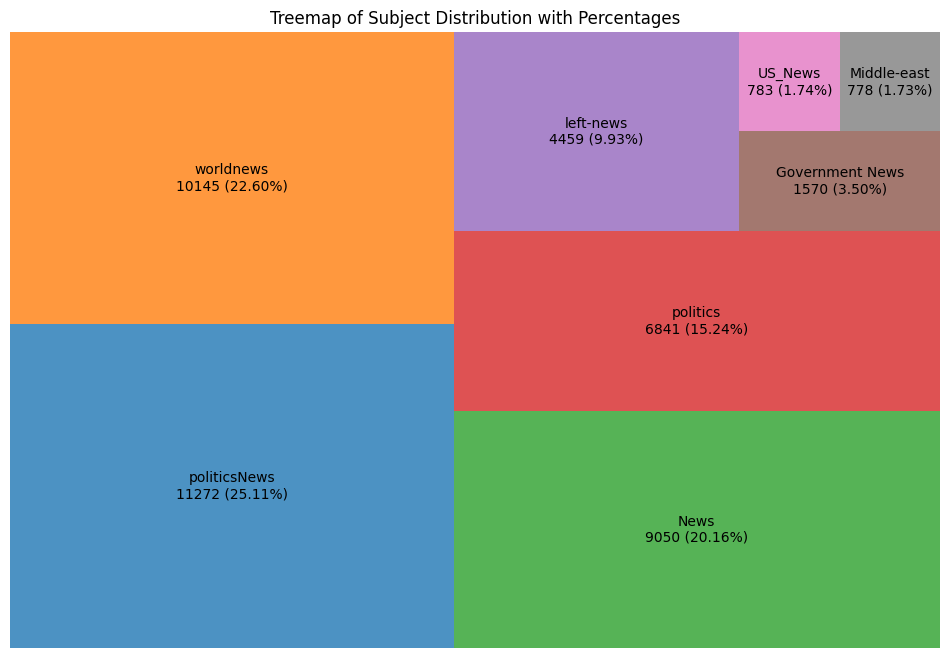

In [10]:

# Count the frequency of each subject
subject_counts = df['subject'].value_counts()

# Calculate percentages
total = subject_counts.sum()
percentages = (subject_counts / total) * 100
labels = [f'{label}\n{size} ({percent:.2f}%)' for label, size, percent in zip(subject_counts.index, subject_counts.values, percentages)]

# Prepare data for the treemap
sizes = subject_counts.values

# Generate unique colors for each subject
colors = list(mcolors.TABLEAU_COLORS.values())

# Plot the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, color=colors[:len(sizes)], alpha=0.8)
plt.axis('off')
plt.title('Treemap of Subject Distribution with Percentages')
plt.show()

The dataset analysis reveals that political news constitute the largest proportion at 25.11%, whereas Middle East news are the least represented at 1.73%. This distribution implies that the model training will be more influenced by political news compared to Middle East news. Proceeding to print subjects along with the total number of fake and true news articles for each subject provides a deeper understanding of data distribution across different categories.

In [11]:
grouped_counts = df.groupby(['subject', 'label']).size().unstack(fill_value=0)

# Rename the columns for better understanding
grouped_counts.columns = ['True News', 'Fake News']

# Display the resulting DataFrame
grouped_counts

,True News,Fake News
subject,,
Government News,1570,0
Middle-east,778,0
News,9050,0
US_News,783,0
left-news,4459,0
politics,6841,0
politicsNews,0,11272
worldnews,0,10145


The dataset reveals that political news and world news, the two largest categories, predominantly contain fake news, while the remaining categories mostly consist of true news. Importantly, the data is evenly distributed between true and fake news, indicating no additional steps are needed in training the model due to balanced classes. Next, word clouds will be generated for True News and Fake News to visualise the most common words within each category. Additionally, a combined word cloud for True and Fake News will be created to identify overlaps and differences in common words across both categories.

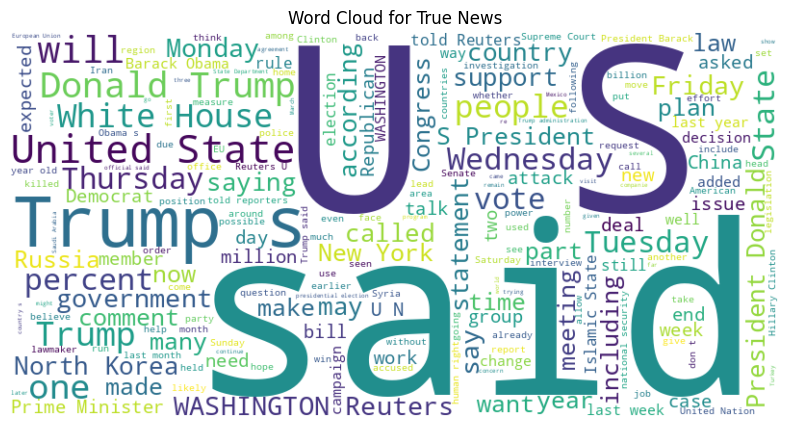

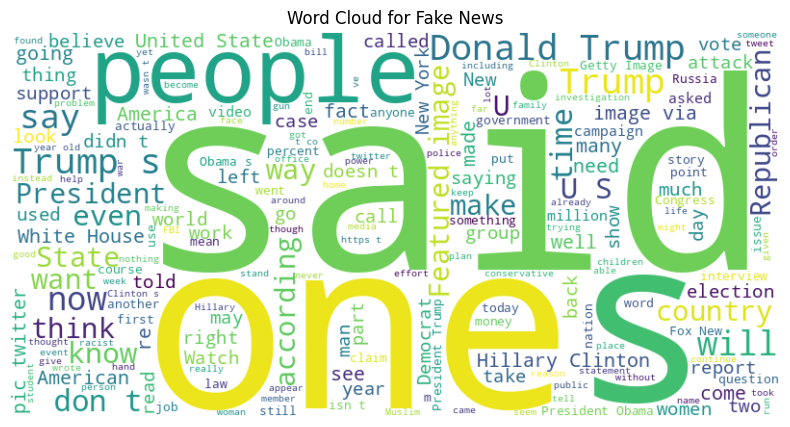

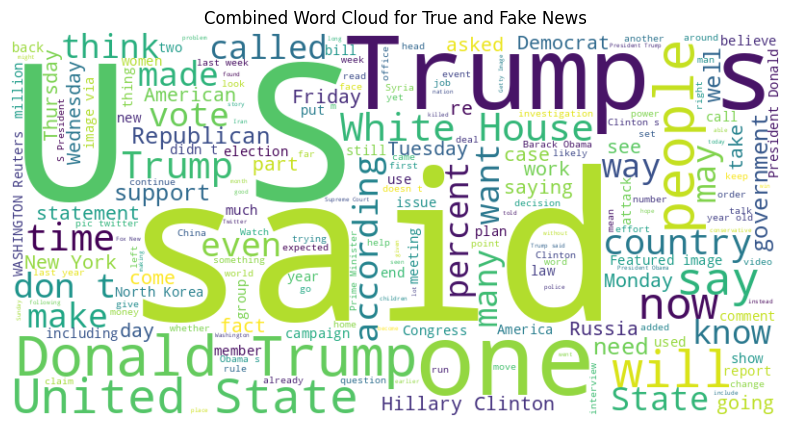

In [12]:

# Separate the articles based on labels
true_news_articles = df[df['label'] == 1]['text'].tolist()
fake_news_articles = df[df['label'] == 0]['text'].tolist()

# Combine the texts for true, fake, and all articles
true_news_text = " ".join(true_news_articles)
fake_news_text = " ".join(fake_news_articles)
combined_text = " ".join(true_news_articles + fake_news_articles)

# Create and display word cloud for true news
wordcloud_true = WordCloud(width=800, height=400, background_color='white').generate(true_news_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.title('Word Cloud for True News')
plt.axis('off')
plt.show()

# Create and display word cloud for fake news
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_news_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud for Fake News')
plt.axis('off')
plt.show()

# Create and display combined word cloud
wordcloud_combined = WordCloud(width=800, height=400, background_color='white').generate(combined_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_combined, interpolation='bilinear')
plt.title('Combined Word Cloud for True and Fake News')
plt.axis('off')
plt.show()

The analysis reveals that common words in true news articles include 'US', 'said', and 'Trump', while fake news articles commonly feature 'one', 'said', and 'S'. Both categories share common words such as 'said', 'Trump', and 'US'.

Lets proceed to prepare the data for the statistical model. To prepare the data for a statistical model, several essential preprocessing steps will be applied:

- **Removing text URLs**: URLs often contain random characters and do not contribute to the semantic meaning of the text. Removing them helps in focusing the model on the actual content of the articles.
- **Tokenizing**: Tokenisation breaks down text into smaller units (tokens), such as words or phrases. This step is essential because machine learning models process text at the token level, enabling analysis of individual units for sentiment, topic, or classification.
- **Converting to lowercase**:     Standardising all text to lowercase ensures that words with the same characters but different cases are treated equally by the model. This step prevents the model from considering 'Word' and 'word' as different tokens.
- **Removing special characters, numbers, and punctuation**: Cleaning the text by eliminating non-alphanumeric characters that do not contribute to meaning.
- **Removing stopwords**: Stopwords are common words that occur frequently but do not contribute much to the meaning of the text. Removing stopwords helps in focusing on the more meaningful words that can better differentiate between classes (e.g., true and fake news).
- **Performing lemmatization**: Reducing words to their base or root form (lemma). This step ensures that different forms of the same word are treated equivalently, reducing the complexity of the vocabulary and improving the model's ability to generalise from the training data.
- **Joining tokens**: After preprocessing, tokens are typically joined back into a single string or document format. This step prepares the text data in a format that can be directly fed into machine learning models for training.

Each of these preprocessing steps plays a crucial role in cleaning and standardising the text data, making it more suitable for machine learning algorithms to analyse and learn patterns effectively. By reducing noise and focusing on meaningful words, these steps enhance the model's ability to distinguish between different classes of text, such as true and fake news articles in this case.

After preprocessing, the cleaned dataset will be stored under the 'preprocessed_data_traditional' column. This prepared dataset will serve as the input for training the statistical model in the subsequent stages of the project.


In [13]:


# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialise stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text_traditional(text):
    # Check if text contains URLs
    if re.search(r'http\S+|www.\S+', text):
        # If URLs found, replace with a placeholder or remove them
        text = re.sub(r'http\S+|www.\S+', '', text)

    # Tokenize text
    tokens = word_tokenize(text)

    # Lowercasing
    tokens = [word.lower() for word in tokens]

    # Remove special characters and numbers, and handle domain-specific adjustments
    tokens = [re.sub(r'[^a-zA-Z0-9\s]', '', word) for word in tokens]

    # Remove punctuation
    tokens = [word.strip() for word in tokens if word.isalnum()]

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Apply preprocessing
df['preprocessed_text_traditional'] = df['text'].apply(preprocess_text_traditional)

# Print a sample of preprocessed data
print(df[['text', 'preprocessed_text_traditional', 'label']])



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


                                                    text  \
0      Last night, the Republican primary went where ...   
1      Tucker Carlson asks Robin Bronk, CEO of the Cr...   
2      President-elect Donald Trump set the stage for...   
3      Donald Trump might want to stop creating publi...   
4      KABUL (Reuters) - A suicide attacker rammed a ...   
...                                                  ...   
44893  A Quincy, Il, man was shot in the hourly hours...   
44894  CAIRO (Reuters) - An Egyptian military officer...   
44895  While they are sad and in understandable despa...   
44896  (Reuters) - Billionaire Carl Icahn will advise...   
44897  (Reuters) - North Carolina lawmakers adjourned...   

                           preprocessed_text_traditional  label  
0      last night republican primary went debate ever...      0  
1      tucker carlson asks robin bronk ceo creative c...      0  
2      presidentelect donald trump set stage truly ha...      0  
3      donald t

Preparing the dataset for an embedding model, such as LSTM (Long Short-Term Memory), involves several key steps:

- **Tokenization**: Converts text data into a format that can be interpreted by the model. Each word is represented by a unique integer, enabling the model to understand and process textual information at the token level.

- **Padding Sequences**: Ensures that all input sequences have the same length. Neural networks process data in batches, and inputs must be uniform in shape to be processed efficiently. Padding fills shorter sequences with a special token (typically zeros) to match the length of the longest sequence in the dataset.

These preprocessing steps are essential for transforming raw text data into a format suitable for training an LSTM model. By tokenizing and padding sequences, the dataset is prepared to maintain consistency in input size and facilitate effective learning and processing by the neural network.



In [14]:
# Assuming df has 'text' and 'label' columns
X_lstm = df['text'].astype(str)
y_lstm = df['label']

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_lstm)
X_seq = tokenizer.texts_to_sequences(X_lstm)

# Padding sequences
max_len = 200  # Max sequence length
X_pad = pad_sequences(X_seq, maxlen=max_len, padding='post')



Differences in Approach:

**Purpose:**
Statistical Preprocessing: Focuses on cleaning and normalising text to enhance the quality of textual data for traditional machine learning models like SVM or logistic regression.
Embedding- based Data Preparation: Primarily transforms text into a numerical format suitable for input into neural networks, specifically LSTM, which processes sequences of data.

**Techniques:**
Statistical Preprocessing: Includes URL removal, tokenization, lowercase conversion, special character and punctuation removal, stopwords removal, and lemmatization.
Embedding- based Data Preparation: Involves tokenization to numerical sequences and padding to ensure uniform input length for efficient neural network processing.

**Output:**
Statistical Preprocessing: Outputs cleaned text ready for feature extraction.
LSTM Data Preparation: Outputs padded sequences suitable for direct input into neural network models like LSTM.

**Complexity:**
Statistical Preprocessing:Includes several text cleaning and normalisation steps tailored to improve interpretability and performance of statistical model.
Embedding- based Data Preparation:  Focuses on transforming text into a structured format compatible with deep learning models, emphasising sequence length uniformity and numerical representation.

Each approach addresses different requirements based on the type of model being used, showcasing how text preprocessing can vary significantly depending on the model type.

### 6. Baseline performance

Moving forward, establishing a baseline model is crucial as it provides a benchmark for evaluating more complex models and assessing the impact of different features. In this project, the K-Nearest Neighbors (KNN) classifier serves as our baseline model. KNN is a supervised learning algorithm that makes predictions based on the proximity of data points in a feature space.

The construction of the baseline model using KNN for text classification involves several key steps:

**1.Data Splitting:** The dataset is split into training and testing sets using an 80%-20% ratio for training and testing, respectively.

**2.Pipeline Construction:** A pipeline is created to streamline the preprocessing and modeling steps:
  - CountVectorizer: Converts text data into a matrix of token counts, preparing it for use by the KNN classifier.
  - KNeighborsClassifier:Implements the KNN algorithm with 3 neighbors for classification tasks.

**3.Model Training:** The pipeline is trained on the training data to learn patterns and relationships between text features and their corresponding labels.

**4.Prediction and Evaluation:** After training, the model predicts labels for the test data and generates a comprehensive classification report:
   - The classification report includes metrics such as precision, recall, F1-score, and support for each class (true and fake news).
   - These metrics quantify how well the KNN model distinguishes between true and fake news articles based on the preprocessed text data.

**5.Performance Summary:** Finally, the classification report is printed, providing insights into the performance of the KNN baseline model on the test data, thus establishing a foundation against which future model improvements can be measured.

This approach ensures a systematic evaluation of model performance and facilitates the iterative refinement of more advanced models tailored to detecting misinformation effectively.

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Splitting data into train and test sets
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(df['preprocessed_text_traditional'], df['label'], test_size=0.2, random_state=42)

# Create pipeline with CountVectorizer and KNeighborsClassifier
knn_baseline_model = make_pipeline(CountVectorizer(), KNeighborsClassifier(n_neighbors=3))

# Train the model
knn_baseline_model.fit(X_train_knn, y_train_knn)

# Predictions
y_pred_knn = knn_baseline_model.predict(X_test_knn)

classification_report_knn = classification_report(y_test_knn, y_pred_knn)
print(classification_report_knn)

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      4658
           1       0.78      0.82      0.80      4322

    accuracy                           0.80      8980
   macro avg       0.80      0.80      0.80      8980
weighted avg       0.80      0.80      0.80      8980



Evaluation of K-Nearest Neighbors (KNN) Baseline Model

The KNN baseline model was evaluated using a test dataset to assess its performance in classifying news articles into fake and true categories. The following metrics were used to evaluate the model:

**Precision:** The precision was 0.82, indicating that 82% of articles predicted as fake news were indeed fake. For true news (class 1), the precision was 0.78, meaning 78% of articles predicted as true news were correct.

**Recall:** The recall for fake news (class 0) was 0.78, indicating that 78% of all actual fake news articles were correctly identified. For true news (class 1), the recall was 0.82, indicating that 82% of all actual true news articles were correctly identified.

**F1-score:** The F1-score is the harmonic mean of precision and recall, providing a balanced measure of a model's performance. Both classes achieved an F1-score of 0.80, indicating overall balanced performance between precision and recall.

**Support:** Support indicates the number of occurrences of each class in the test dataset. Class 0 (fake news) had a support of 4658, and class 1 (true news) had a support of 4322, reflecting the distribution of instances across the classes.

Conclusion

The KNN baseline model demonstrated robust performance with an overall accuracy of 80%. It effectively distinguished between fake and true news articles, achieving balanced precision and recall scores across both classes. The aim of this project is for both statistical and embedding models to surpass the performance of the baseline KNN model.

### 7. Comparitive classification approach
We will now proceed to build the Naive Bayes (NB) model:

Data Splitting:
The preprocessed text and corresponding labels are split into training and testing sets. Here, 80% of the data is used for training and 20% for testing.

**Pipeline Creation:**
A pipeline is created:
TfidfVectorizer(): Converts text documents into a matrix of TF-IDF features, which captures the importance of terms relative to the entire corpus.
MultinomialNB() implements the Multinomial Naive Bayes classifier, which is suitable for classifying text with discrete features like word counts.

**Model Training:**
The pipeline is trained on the training data. During this process:
TfidfVectorizer learns the vocabulary and converts text data into numerical features based on term importance.
MultinomialNB computes the probability distribution of features given each class.

**Prediction:**
The trained model predicts labels for the test data. Before making predictions, TfidfVectorizer transforms the test data into the same format as the training data.

**Evaluation:**
The model computes and prints a classification report, which includes metrics such as precision, recall, F1-score, and support. This report evaluates how well the model distinguishes between different classes based on its predictions compared to the actual labels in the test set.

In [16]:
#naive bayes model archit

# Splitting data into train and test sets
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(df['preprocessed_text_traditional'], df['label'], test_size=0.2, random_state=42)


# Create pipeline with TfidfVectorizer and MultinomialNB
model_nb = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the model
model_nb.fit(X_train_nb, y_train_nb)

# Predictions
y_pred_nb = model_nb.predict(X_test_nb)

# Evaluation
print(classification_report(y_test_nb, y_pred_nb))


              precision    recall  f1-score   support

           0       0.95      0.93      0.94      4658
           1       0.93      0.94      0.94      4322

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



After training and testing on the preprocessed dataset, the naive bayes model achieved the following performance metrics:

**Precision**: In this case, for class 0, 0.95 of the predictions labeled as 0 are actually 0. For class 1, 0.93 of the predictions labeled as 1 are actually 1.This indicates that when the model predicted an article as fake news or true news, it was correct 96% and 95% of the time, respectively.

**Recall**: Both classes showed high recall scores, for class 0, 0.93 of the actual 0s were correctly predicted as 0. For class 1, 0.94 of the actual 1s were correctly predicted as 1.This indicates that when the model predicted an article as fake news or true news, it was correct 0.93 and 0.94 of the time, respectively.

**F1-score**: The F1-score, which balances precision and recall of 94%.This suggests robust performance in terms of both correctly identifying relevant articles and minimising misclassifications.

**Accuracy**: The overall accuracy of the model was 94%, indicating that it correctly classified 94% of all articles in the test set.

In summary, the Naive Bayes model performed exceptionally well on the task of classifying news articles as true or fake based on the provided dataset and preprocessing steps.It performed 14% better than the baseline model.

The next stage of this project involves constructing an LSTM model. The steps include

**1.Data Splitting:** Splits the preprocessed and padded data and labels into training and testing sets.

**2.Sequential Model Initialisation:** Initialises a sequential model where layers are added sequentially.

**3.Embedding Layer:** Converts integer-encoded words into dense vectors of fixed size and specified maximum input length.

**4.SpatialDropout1D Layer:** Randomly drops out entire 1D feature maps in the embedding layer to prevent overfitting.

**5.LSTM Layer:** Long Short-Term Memory layer with specified units , which preserves sequence information and handles dependencies over time steps. Includes dropout and recurrent dropout for regularization.

**6.Dense Layer:** Fully connected layer with a single neuron and sigmoid activation function, suitable for binary classification tasks.

**7.Compilation:** Configure the model for training with `adam` optimizer, `binary_crossentropy` loss function, and `accuracy` as the metric to monitor during training.

**8.Training:** Train the model on the training data for a specified number of epochs, with a batch size of 32.

**9.Validation:** Evaluate the model's performance on the test data during training to monitor its accuracy and loss metrics.

This setup effectively prepares and trains an LSTM model for text classification, leveraging word embeddings and LSTM's ability to capture sequential dependencies in text data.

In [17]:
# Splitting data into train and test sets
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_pad, y_lstm, test_size=0.2, random_state=42)

# Define model architecture
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=128, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))  # Binary classification output

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 3
batch_size = 32
history = model.fit(X_train_lstm, y_train_lstm, epochs=epochs, batch_size=batch_size, validation_data=(X_test_lstm, y_test_lstm), verbose=1)


Epoch 1/3
1123/1123 [==============================] - 1209s 1s/step - loss: 0.1321 - accuracy: 0.9580 - val_loss: 0.0542 - val_accuracy: 0.9867
Epoch 2/3
1123/1123 [==============================] - 1195s 1s/step - loss: 0.0859 - accuracy: 0.9693 - val_loss: 0.1346 - val_accuracy: 0.9567
Epoch 3/3
1123/1123 [==============================] - 1202s 1s/step - loss: 0.0897 - accuracy: 0.9707 - val_loss: 0.0939 - val_accuracy: 0.9707


Generate predictions from an LSTM model and convert these predictions into binary class labels.

In [18]:
# Make predictions on the test set
y_pred_probs = model.predict(X_test_lstm)
y_pred_lstm = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary outputs


281/281 [==============================] - 18s 63ms/step


To evaluate performance of the LSTM model similar to the Naive Bayes model, we calculate the following evaluation metrics: accuracy, precision, recall, and F1-score.

In [26]:
# Calculate metrics
accuracy_lstm = accuracy_score(y_test_lstm, y_pred_lstm)
precision_lstm = precision_score(y_test_lstm, y_pred_lstm, average='weighted')
recall_lstm = recall_score(y_test_lstm, y_pred_lstm, average='weighted')
f1_lstm = f1_score(y_test_lstm, y_pred_lstm, average='weighted')

# Print metrics
print(f'Accuracy: {accuracy_lstm:.4f}')
print(f'Precision: {precision_lstm:.4f}')
print(f'Recall: {recall_lstm:.4f}')
print(f'F1 Score: {f1_lstm:.4f}')


Accuracy: 0.9707
Precision: 0.9717
Recall: 0.9707
F1 Score: 0.9707


In summary the lstm model performed:

- **Accuracy**: 0.9707
Interpretation: In this context, the model correctly predicts 96.46% of the instances in the test set.

- **Precision**: 0.9717
Interpretation: When the model predicts an instance as positive, it is correct 96.59% of the time.

- **Recall**: 0.9707
Interpretation: The model correctly identifies 96.46% of all actual positive instances.

- **F1 Score**: 0.9707
Interpretation: The harmonic mean of precision and recall is 96.46%, indicating a balanced performance between precision and recall.


These metrics are all 0.9707, demonstrating that the model performs consistently well across different evaluation criteria. This high level of performance surpasses the baseline model by 17.07%. It also out performs the naive bayes model by 3.07 %.

In [20]:
print(classification_report(y_test_nb, y_pred_nb))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      4658
           1       0.93      0.94      0.94      4322

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



## III. Conclusion

### 9. Performance Analysis & Comparative Discussion

In [21]:
# Classification Report for Naive Bayes
print("Classification Report - Naive Bayes")
print(classification_report(y_test_nb, y_pred_nb))

# Classification Report for LSTM
print("Classification Report - LSTM")
print(classification_report(y_test_lstm, y_pred_lstm))

Classification Report - Naive Bayes
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      4658
           1       0.93      0.94      0.94      4322

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980

Classification Report - LSTM
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      4658
           1       0.95      0.99      0.97      4322

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980



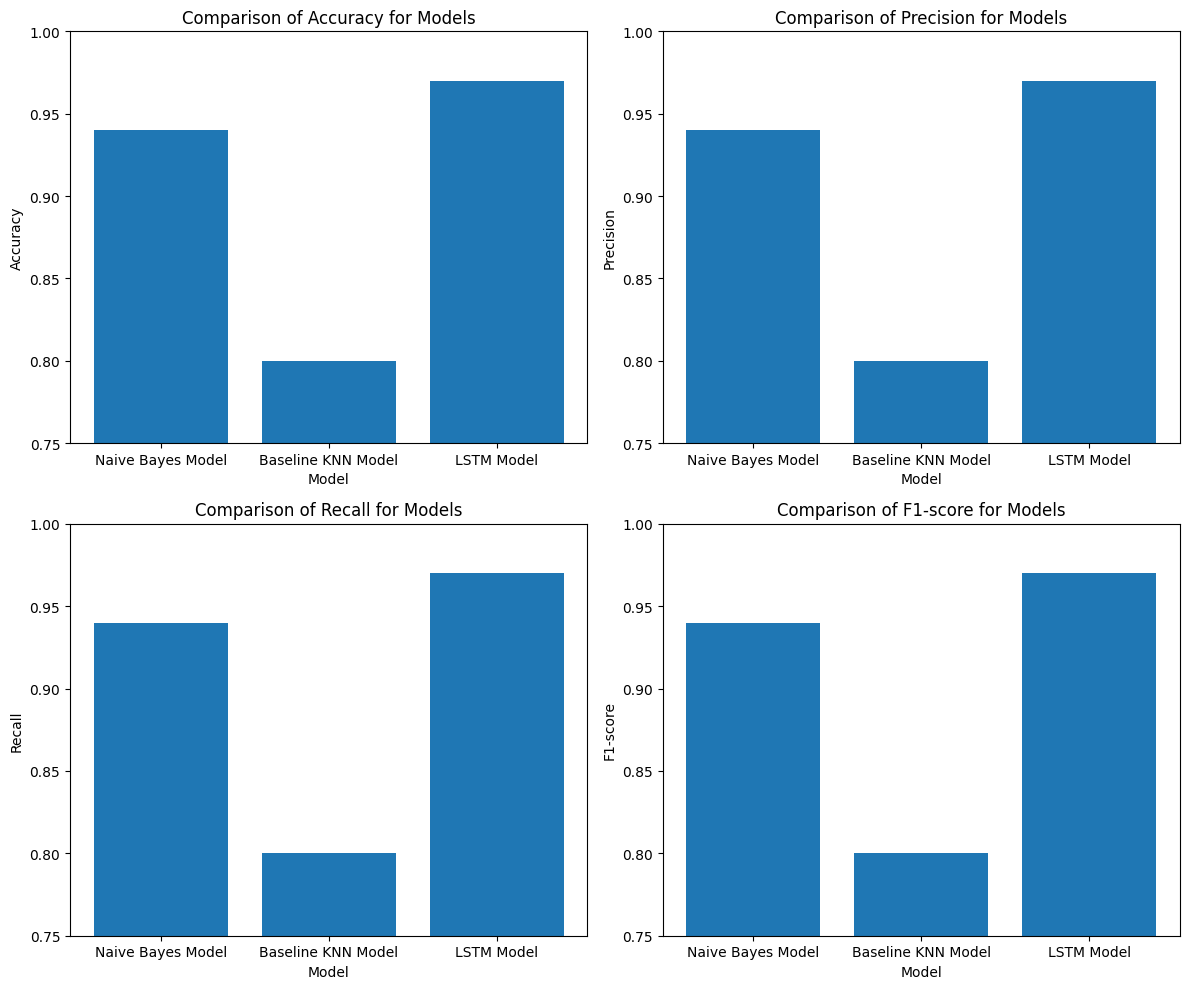

In [32]:
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'Model': ['Naive Bayes Model', 'Baseline KNN Model', 'LSTM Model'],
    'Accuracy': [0.94, 0.80, 0.97],
    'Precision': [0.94, 0.80,0.97],
    'Recall': [0.94, 0.80, 0.97],
    'F1-score': [0.94, 0.80, 0.97]
})

# Plot the metrics
plt.figure(figsize=(12, 10))
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']

for i, metric in enumerate(metrics_names):
    plt.subplot(2, 2, i+1)
    plt.bar(df['Model'], df[metric])
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.ylim(0.75, 1.00)  #
    plt.title(f'Comparison of {metric} for Models')
    plt.tight_layout()

plt.show()


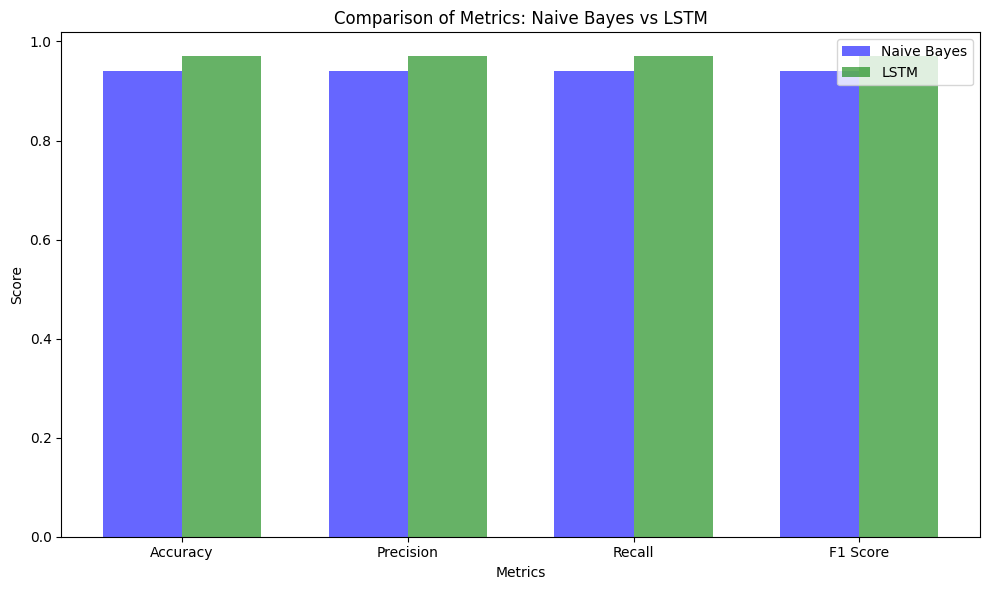

In [25]:

# Metrics for Naive Bayes model
accuracy_nb = 0.94
precision_nb = 0.94
recall_nb = 0.94
f1_nb = 0.94

# Metrics for LSTM model
accuracy_lstm = 0.97
precision_lstm = 0.97
recall_lstm = 0.97
f1_lstm = 0.97

# Bar plot setup
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
nb_scores = [accuracy_nb, precision_nb, recall_nb, f1_nb]
lstm_scores = [accuracy_lstm, precision_lstm, recall_lstm, f1_lstm]
bar_width = 0.35
index = range(len(metrics))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(index, nb_scores, bar_width, label='Naive Bayes', color='b', alpha=0.6)
plt.bar([i + bar_width for i in index], lstm_scores, bar_width, label='LSTM', color='g', alpha=0.6)

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Comparison of Metrics: Naive Bayes vs LSTM')
plt.xticks([i + bar_width/2 for i in index], metrics)
plt.legend()
plt.tight_layout()
plt.show()



**Naive Bayes Model**:

**Strengths**:

**Accuracy**: Achieved an accuracy of 94%, demonstrating robust performance in classifying true and fake news articles.

**Precision and Recall**: High precision and recall scores of 94% indicate accurate classification with minimal false positives and negatives.

**Weaknesses**:

**Assumptions**: Relies on the assumption of feature independence, which may not hold true for natural language processing tasks.
**Feature Sensitivity**: Performance heavily influenced by the quality of features like word frequencies, potentially missing nuanced contextual meanings.

**LSTM Model**:

**Strengths**:

**High Accuracy**: Achieved an accuracy of 97%, indicating superior overall performance compared to Naive Bayes.

**Balanced Precision and Recall**:Both metrics stand at 97%, indicating robust classification capability with high confidence.
**Weaknesses**:

**Computational Complexity**: Requires significant computational resources, especially with larger datasets and longer sequences.
**Overfitting Risk**: Despite regularization techniques, LSTMs can overfit if not properly tuned or when dataset size is insufficient.

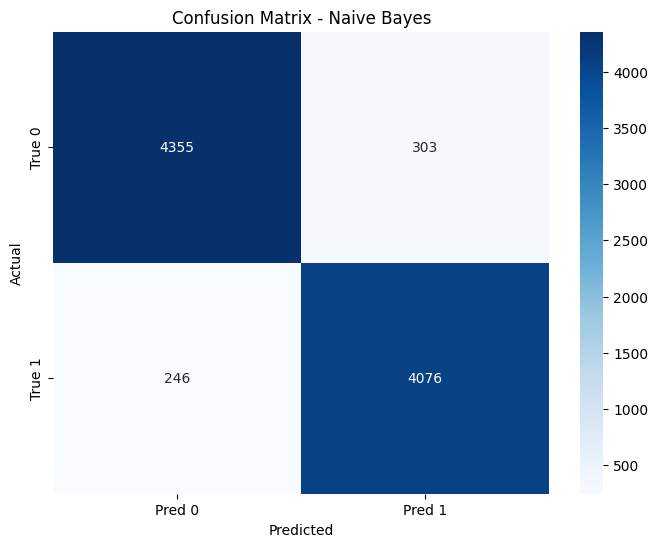

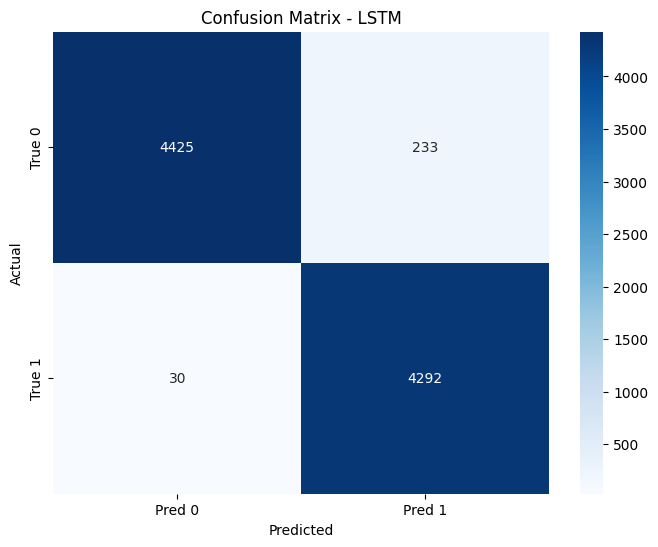

In [23]:
# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test_nb, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for LSTM
cm_lstm = confusion_matrix(y_test_lstm, y_pred_lstm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.title('Confusion Matrix - LSTM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Naive Bayes:**
- **True Positives (Pred 1, True 1):** 4076 instances
- **False Negatives (Pred 0, True 1):** 246 instances
- **True Negatives (Pred 0, True 0):** 4355 instances
- **False Positives (Pred 1, True 0):** 303 instances

**LSTM:**
- **True Positives (Pred 1, True 1):** 4292 instances
- **False Negatives (Pred 0, True 1):** 30 instances
- **True Negatives (Pred 0, True 0):** 4425 instances
- **False Positives (Pred 1, True 0):** 233 instances

**Comparison:**
LSTM exhibits superior performance in identifying true positives and minimising false negatives compared to Naive Bayes. However, Naive Bayes shows better performance in true negatives and fewer false positives.

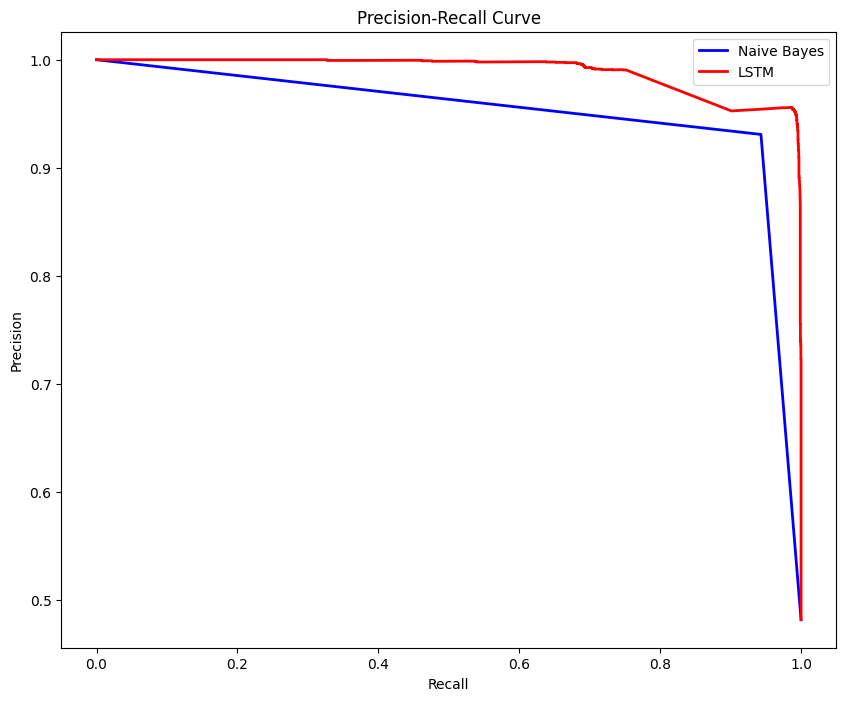

In [27]:
# Precision-Recall Curve for Naive Bayes
precision_nb, recall_nb, _ = precision_recall_curve(y_test_nb, y_pred_nb)

# Precision-Recall Curve for LSTM
precision_lstm, recall_lstm, _ = precision_recall_curve(y_test_lstm, y_pred_probs)

plt.figure(figsize=(10, 8))
plt.plot(recall_nb, precision_nb, color='blue', lw=2, label='Naive Bayes')
plt.plot(recall_lstm, precision_lstm, color='red', lw=2, label='LSTM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()


281/281 [==============================] - 16s 57ms/step


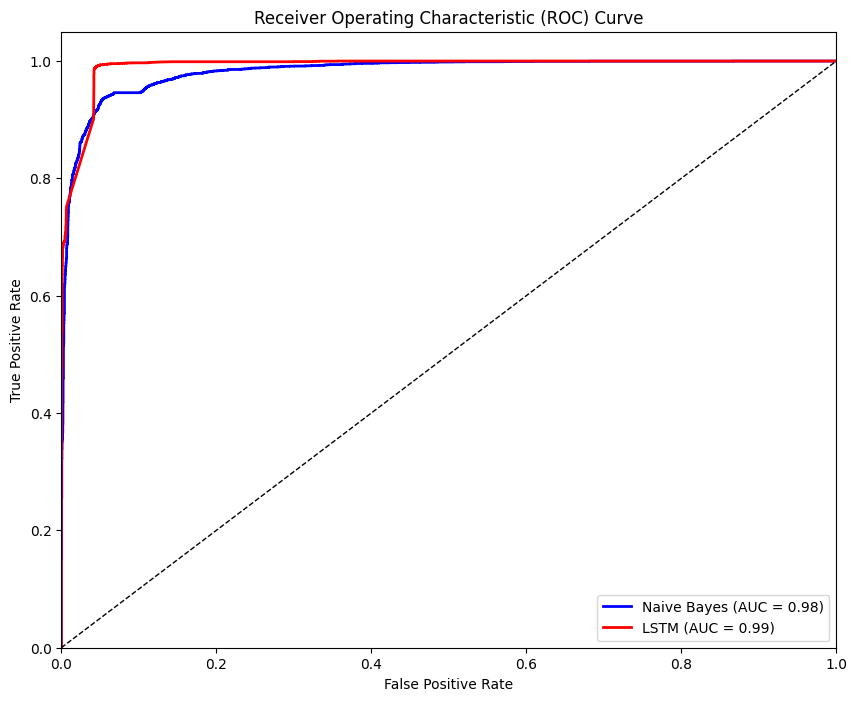

In [28]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_probs_nb = model_nb.predict_proba(X_test_nb)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test_nb, y_pred_probs_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

y_pred_probs_lstm = model.predict(X_test_lstm)
fpr_lstm, tpr_lstm, _ = roc_curve(y_test_lstm, y_pred_probs_lstm)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

# Plot ROC curves for both models
plt.figure(figsize=(10, 8))
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot(fpr_lstm, tpr_lstm, color='red', lw=2, label='LSTM (AUC = %0.2f)' % roc_auc_lstm)
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**ROC Curve Comparison**:

LSTM shows a higher Area Under the Curve (AUC), indicating better discrimination between positive and negative instances compared to Naive Bayes.
**Precision-Recall Curve Comparison**
Precision-Recall Curve: LSTM achieves higher AUC, demonstrating superior precision and recall simultaneously across various decision thresholds.

**Interpretation**

**Better Discriminative Power**:  LSTM's higher AUC suggests better capability in distinguishing between true and false positives.
**Improved Performance**:LSTM's higher precision and recall make it more effective for classification tasks, especially in scenarios sensitive to false positives.
**Flexibility in Threshold Adjustment**: LSTM's tunability allows for adjustment between precision and recall based on specific application needs, highlighting its adaptability.

LSTM outperforms Naive Bayes in overall performance metrics such as accuracy, precision, and recall, emphasising its effectiveness in classifying fake news. Despite its computational demands, LSTM's ability to capture sequential dependencies in data provides significant advantages over Naive Bayes' simpler approach.


### 10. Project Summary and Reflections

#### Practicality of Each Model Type

**Naive Bayes Model:**
- **Strengths:** The Naive Bayes model demonstrated robust performance with an accuracy of 94%. It excelled in scenarios where computational resources are limited and speed is crucial, making it practical for real-time applications.
- **Weaknesses:** It relies on the assumption of feature independence, which may not hold in complex NLP tasks like news classification, impacting its ability to capture subtle dependencies in text.
**LSTM Model:**
- **Strengths:** The LSTM model achieved superior accuracy (97%) and demonstrated balanced precision and recall. Its ability to capture sequential dependencies in text data makes it suitable for tasks requiring nuanced understanding of language.
- **Weaknesses:** LSTM models are computationally intensive, requiring more time and resources for training, which can be a limitation in resource-constrained environments.

#### Potential Applications in Real-World Scenarios

**Naive Bayes:**
- **Application:** It can be applied in scenarios where quick decisions are needed, such as real-time news classification for media platforms or social media monitoring tools.

**LSTM:**
- **Application:** Suitable for applications demanding high accuracy and nuanced understanding of text, such as identifying misinformation in news articles or analysing sentiment in customer reviews.

#### Transferability and Future Directions

**Transferability:**
- The solution developed for fake news detection using LSTM can be transferred to other domain-specific areas involving text classification, such as medical diagnosis based on patient records or sentiment analysis in financial reports.
- The preprocessing steps and model architectures can serve as foundational frameworks adaptable to various datasets and problem domains.

**Improvements and Future Research:**
- **Enhanced Feature Engineering:** Explore advanced feature extraction techniques or domain-specific embeddings to improve Naive Bayes model performance.
- **Ensemble Methods:** Investigate ensemble approaches combining Naive Bayes with LSTM or other models to leverage their complementary strengths.
- **Interpretability:** Develop methods for interpreting model decisions in NLP tasks to enhance transparency and trust in automated systems.


### Conclusion

In conclusion, this project has provided valuable insights into the application of machine learning and deep learning models for fake news detection. While Naive Bayes offers simplicity and speed, LSTM excels in accuracy and contextual understanding. Both models contribute significantly to tackling the challenge of misinformation, with potential applications across diverse domains. Moving forward, refining model architectures, exploring new datasets, and addressing interpretability challenges will pave the way for more effective and reliable solutions in the field of text classification and beyond.

### References:

[1] Straits Times, 2022, Many in Singapore confident they can spot fake news but may not actually be able to: Study, Readily available (Online) at : https://www.straitstimes.com/tech/tech-news/many-in-singapore-confident-they-can-spot-fake-news-but-may-not-actually-be-able-to-study

[2] Gov.sg,2018, Fake news hurts, Readily available (Online) at : https://www.gov.sg/article/fake-news-hurts

[3] Singapore Samizdat, 2022, POFMA: How is Singapore using its anti fake news law?, Readily available (Online) at : https://www.singapore-samizdat.com/p/pofma-anti-fake-news-law

[4] Zhou et al., 2020, A Survey of Fake News: Fundamental Theories, Detection Methods, and Opportunities, Readily available (Online) at : https://arxiv.org/abs/1812.00315

[5] Evidently AI Team, ND, Accuracy vs. precision vs. recall in machine learning: what's the difference?, Readily available (Online) at : https://www.evidentlyai.com/classification-metrics/accuracy-precision-recall#:~:text=Accuracy%20is%20a%20metric%20that,often%20the%20model%20is%20right%3F

Dataset: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset